### Importação dos dados



In [41]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()
loja2.head()
loja3.head()
loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


   Local da compra      Preço
24              SP  586673.21
18              RJ  230010.44
10              MG  165802.37
21              RS  111347.05
17              PR   94643.66
22              SC   56332.09
8               GO   50505.47
4               BA   43877.34
6               DF   29729.23
15              PE   23439.02
7               ES   18620.76
5               CE   17597.97
12              MT   15444.54
13              PA   12884.92
14              PB   12737.79
11              MS   11798.61
1               AL   10703.35
25              TO    9549.53
19              RN    7257.66
23              SE    6154.07
20              RO    5501.27
16              PI    4658.58
9               MA    4115.02
0               AC    2320.42
2               AM    1495.21
3               AP    1309.54


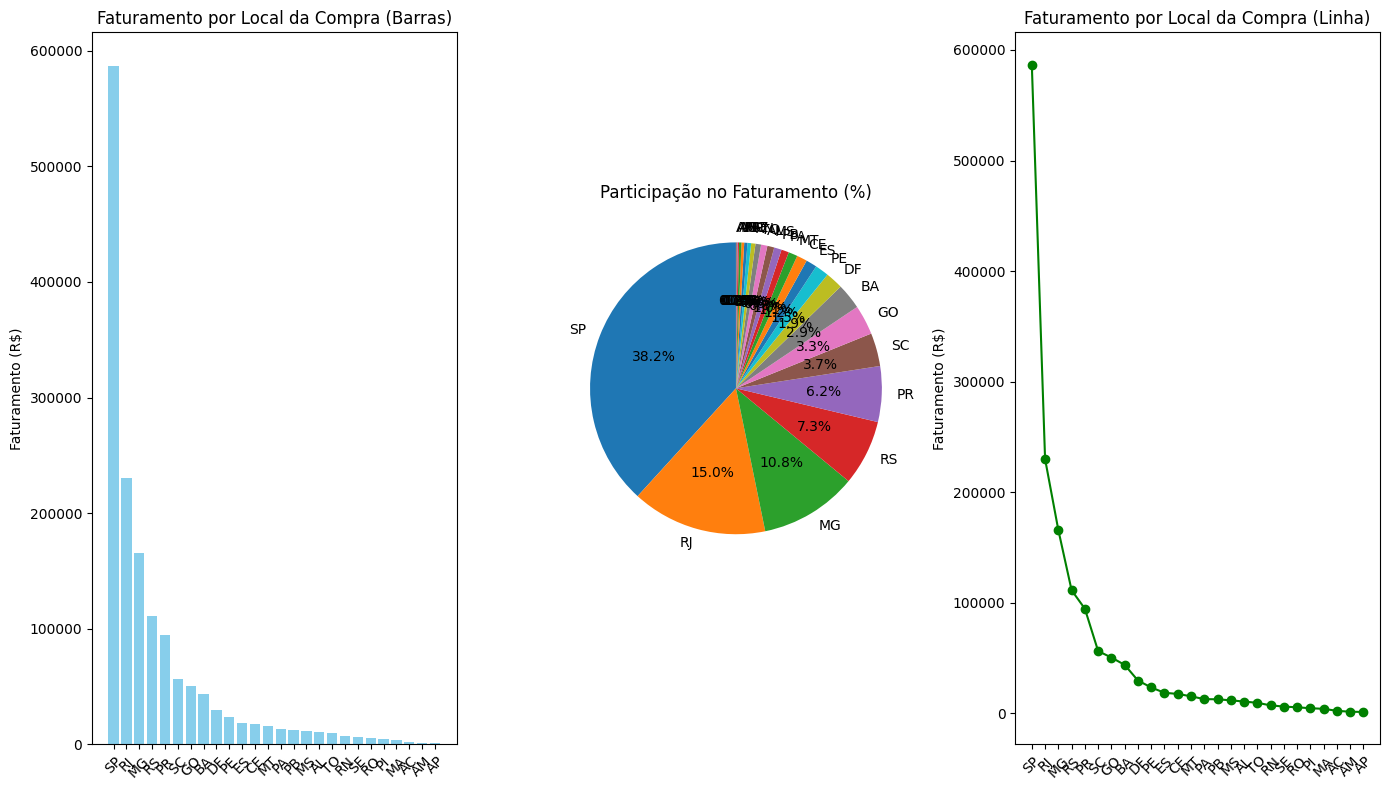

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Cálculo do faturamento total por loja
faturamento_por_loja = loja.groupby("Local da compra")["Preço"].sum().reset_index()

# Ordenar para visualização mais clara
faturamento_por_loja = faturamento_por_loja.sort_values(by="Preço", ascending=False)

# Exibir a tabela no console
print(faturamento_por_loja)

# Criar os 3 gráficos
plt.figure(figsize=(14, 8))

# 1️⃣ Gráfico de Barras
plt.subplot(1, 3, 1)
plt.bar(faturamento_por_loja["Local da compra"], faturamento_por_loja["Preço"], color="skyblue")
plt.title("Faturamento por Local da Compra (Barras)")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)

# 2️⃣ Gráfico de Pizza
plt.subplot(1, 3, 2)
plt.pie(faturamento_por_loja["Preço"], labels=faturamento_por_loja["Local da compra"], autopct="%1.1f%%", startangle=90)
plt.title("Participação no Faturamento (%)")

# 3️⃣ Gráfico de Linha
plt.subplot(1, 3, 3)
plt.plot(faturamento_por_loja["Local da compra"], faturamento_por_loja["Preço"], marker="o", color="green")
plt.title("Faturamento por Local da Compra (Linha)")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


Categorias mais populares por loja:
    Local da compra   Categoria do Produto  Quantidade Vendida
0                AC       eletrodomesticos                   1
5                AL            eletronicos                   9
17               AM                 moveis                   4
22               AP  instrumentos musicais                   3
30               BA                 moveis                  71
34               CE            eletronicos                  28
40               DF             brinquedos                  50
54               ES                 moveis                  37
62               GO                 moveis                  46
70               MA                 moveis                  17
73               MG            eletronicos                 219
81               MS            eletronicos                  14
93               MT                 moveis                  16
97               PA            eletronicos                  16
106              PB

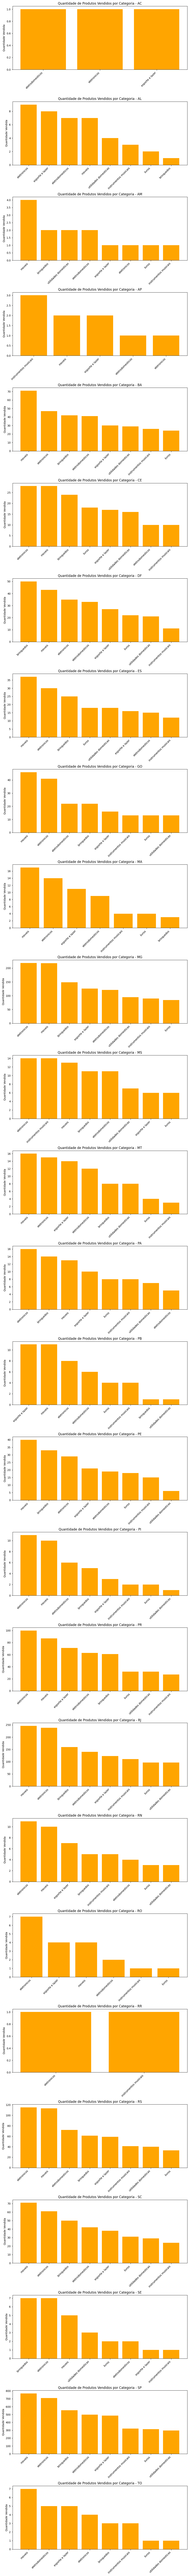

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

for var in [loja, loja2, loja3, loja4]:
    if not isinstance(var, pd.DataFrame):
        raise TypeError(f"Expected a pandas DataFrame, but found type: {type(var)}")

# Concatenate all dataframes into a single dataframe
all_lojas_df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)


# Calcular quantidade de produtos vendidos por Loja e Categoria
vendas_por_categoria_loja = (
    all_lojas_df.groupby(["Local da compra", "Categoria do Produto"])["Produto"]
    .count()
    .reset_index(name="Quantidade Vendida")
)

# Encontrar a categoria mais popular em cada loja
categorias_populares = vendas_por_categoria_loja.sort_values(
    by=["Local da compra", "Quantidade Vendida"], ascending=[True, False]
).groupby("Local da compra").head(1)

print("Categorias mais populares por loja:")
print(categorias_populares)

# ----- Visualização -----
lojas_unicas = vendas_por_categoria_loja["Local da compra"].unique()
fig, axes = plt.subplots(len(lojas_unicas), 1, figsize=(10, 5 * len(lojas_unicas)))

if len(lojas_unicas) == 1:
    axes = [axes]  # garante que seja iterável mesmo com 1 loja

for ax, loja_nome in zip(axes, lojas_unicas):
    dados_loja = vendas_por_categoria_loja[vendas_por_categoria_loja["Local da compra"] == loja_nome]
    dados_loja = dados_loja.sort_values(by="Quantidade Vendida", ascending=False)

    ax.bar(dados_loja["Categoria do Produto"], dados_loja["Quantidade Vendida"], color="orange")
    ax.set_title(f"Quantidade de Produtos Vendidos por Categoria - {loja_nome}")
    ax.set_ylabel("Quantidade Vendida")
    ax.set_xticks(range(len(dados_loja["Categoria do Produto"]))) # Set explicit ticks
    ax.set_xticklabels(dados_loja["Categoria do Produto"], rotation=45, ha="right")


plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

   Local da compra  Média de Avaliação
19              RN            4.208333
25              SP            4.113619
12              MT            4.112500
11              MS            4.097561
10              MG            4.090744
14              PB            4.086957
17              PR            4.078224
2               AM            4.071429
6               DF            4.020661
22              RS            4.018727
7               ES            4.017544
23              SC            4.011561
15              PE            3.977901
8               GO            3.940860
20              RO            3.894737
26              TO            3.827586
4               BA            3.803226
16              PI            3.800000
3               AP            3.777778
18              RJ            3.777228
13              PA            3.691358
9               MA            3.677419
0               AC            3.666667
1               AL            3.634146
5               CE       

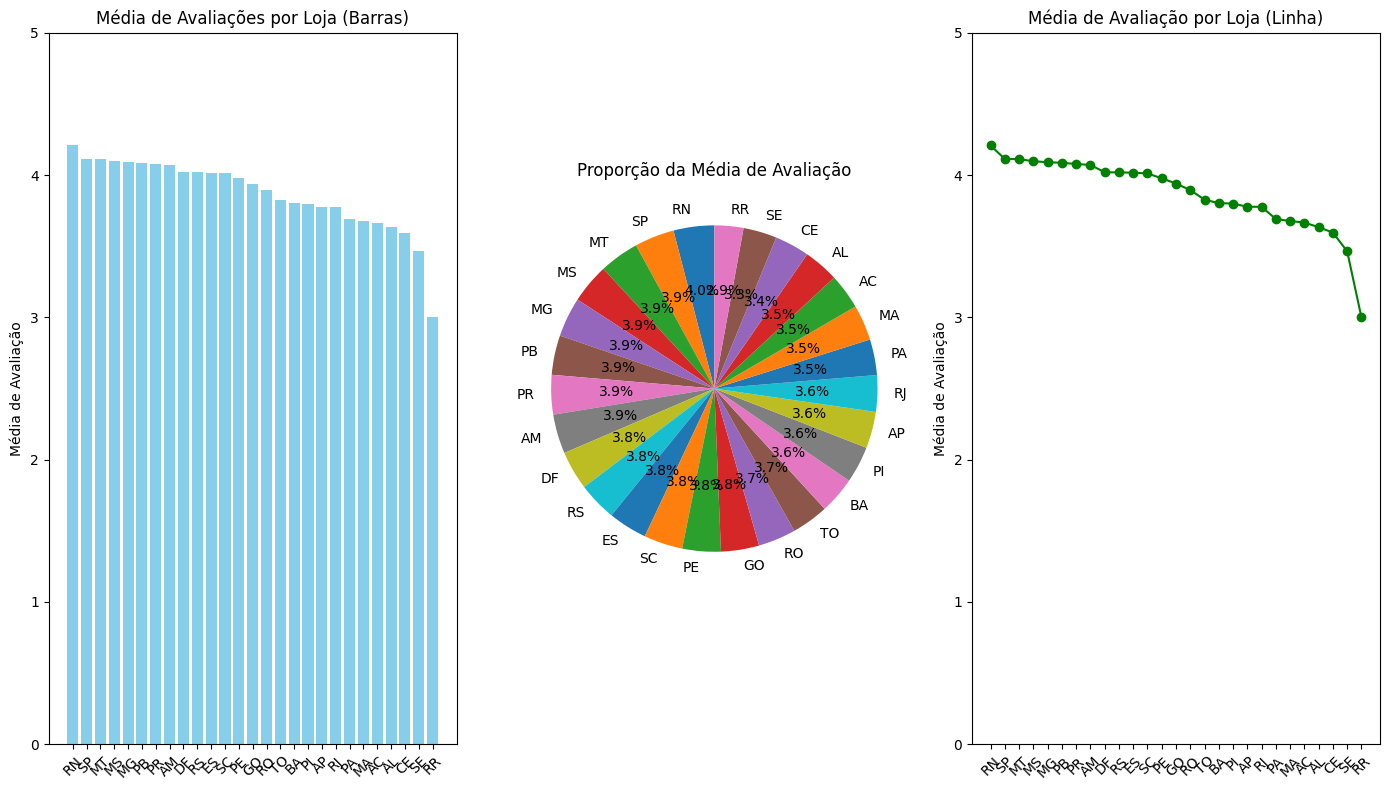

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular média das avaliações por loja
media_avaliacao = (
    all_lojas_df.groupby("Local da compra")["Avaliação da compra"]
      .mean()
      .reset_index(name="Média de Avaliação")
)

# Ordenar da maior para a menor média
media_avaliacao = media_avaliacao.sort_values(by="Média de Avaliação", ascending=False)

# Exibir no console
print(media_avaliacao)

# Criar os gráficos
plt.figure(figsize=(14, 8))

# 1️⃣ Gráfico de Barras
plt.subplot(1, 3, 1)
plt.bar(media_avaliacao["Local da compra"], media_avaliacao["Média de Avaliação"], color="skyblue")
plt.title("Média de Avaliações por Loja (Barras)")
plt.ylabel("Média de Avaliação")
plt.ylim(0, 5)  # Avaliação da compra vai de 1 a 5
plt.xticks(rotation=45)

# 2️⃣ Gráfico de Pizza
plt.subplot(1, 3, 2)
plt.pie(
    media_avaliacao["Média de Avaliação"],
    labels=media_avaliacao["Local da compra"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Proporção da Média de Avaliação")

# 3️⃣ Gráfico de Linha
plt.subplot(1, 3, 3)
plt.plot(
    media_avaliacao["Local da compra"],
    media_avaliacao["Média de Avaliação"],
    marker="o",
    color="green"
)
plt.title("Média de Avaliação por Loja (Linha)")
plt.ylabel("Média de Avaliação")
plt.ylim(0, 5) # Avaliação da compra vai de 1 a 5
plt.xticks(rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Contagem de vendas por produto e loja
vendas_produto = (
    all_lojas_df.groupby(["Loja", "Produto"])["Produto"]
      .count()
      .reset_index(name="Quantidade Vendida")
)

# Ordenar por loja e quantidade
vendas_produto = vendas_produto.sort_values(
    by=["Loja", "Quantidade Vendida"], ascending=[True, False]
)

# Identificar mais vendidos e menos vendidos por loja
mais_vendidos = vendas_produto.groupby("Loja").head(1).reset_index(drop=True)
menos_vendidos = vendas_produto.groupby("Loja").tail(1).reset_index(drop=True)

print("📈 Produtos mais vendidos por loja:")
print(mais_vendidos)
print("\n📉 Produtos menos vendidos por loja:")
print(menos_vendidos)

# Unir mais e menos vendidos para visualização
destaques = pd.concat([mais_vendidos, menos_vendidos])
destaques["Tipo"] = ["Mais Vendido"] * len(mais_vendidos) + ["Menos Vendido"] * len(menos_vendidos)

# Criar os gráficos
plt.figure(figsize=(15, 8))

# 1️⃣ Gráfico de Barras (Comparação mais x menos vendido)
plt.subplot(1, 3, 1)
cores = ["green" if t == "Mais Vendido" else "red" for t in destaques["Tipo"]]
plt.bar(destaques["Produto"], destaques["Quantidade Vendida"], color=cores)
plt.title("Mais e Menos Vendidos por Loja (Barras)")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)

# 2️⃣ Gráfico de Pizza (por loja, mais vendido)
plt.subplot(1, 3, 2)
plt.pie(
    mais_vendidos["Quantidade Vendida"],
    labels=mais_vendidos["Produto"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Participação dos Mais Vendidos (por loja)")

# 3️⃣ Gráfico de Linha (Todos os destaques)
plt.subplot(1, 3, 3)
for loja in destaques["Loja"].unique():
    dados_loja = destaques[destaques["Loja"] == loja]
    plt.plot(dados_loja["Produto"], dados_loja["Quantidade Vendida"], marker="o", label=loja)
plt.title("Comparação dos Destaques por Loja (Linha)")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


KeyError: 'Loja'

KeyError: 'Loja'

# 5. Frete Médio por Loja


   Local da compra  Custo Médio de Frete
21              RR                113.67
0               AC                 49.36
20              RO                 46.35
19              RN                 40.09
8               GO                 38.13
16              PI                 36.95
22              RS                 36.58
15              PE                 35.72
9               MA                 35.13
17              PR                 34.57
18              RJ                 33.94
14              PB                 33.91
11              MS                 33.69
26              TO                 33.46
10              MG                 33.46
1               AL                 33.26
7               ES                 33.20
25              SP                 32.71
12              MT                 32.69
13              PA                 30.63
24              SE                 30.49
4               BA                 30.26
6               DF                 30.19
23              

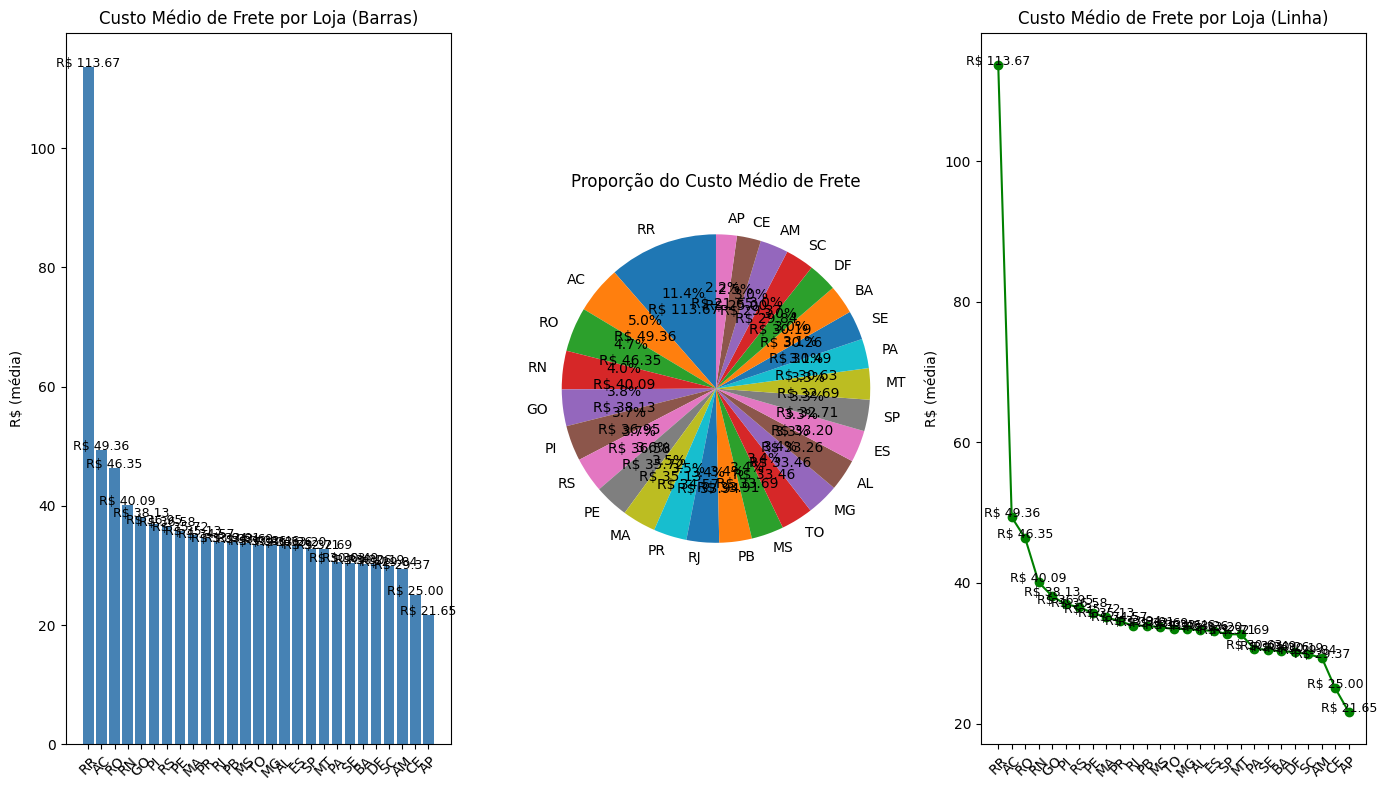

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular custo médio de frete por loja
media_frete = (
    all_lojas_df.groupby("Local da compra")["Frete"]
      .mean()
      .reset_index(name="Custo Médio de Frete")
)

# Ordenar do maior para o menor
media_frete = media_frete.sort_values(by="Custo Médio de Frete", ascending=False)

# Mostrar no console formatado em R$
media_frete["Custo Médio de Frete"] = media_frete["Custo Médio de Frete"].round(2)
print(media_frete)

# Criar gráficos
plt.figure(figsize=(14, 8))

# 1️⃣ Gráfico de Barras com valores
plt.subplot(1, 3, 1)
plt.bar(media_frete["Local da compra"], media_frete["Custo Médio de Frete"], color="steelblue")
for i, v in enumerate(media_frete["Custo Médio de Frete"]):
    plt.text(i, v + 0.02, f"R$ {v:,.2f}", ha='center', fontsize=9)
plt.title("Custo Médio de Frete por Loja (Barras)")
plt.ylabel("R$ (média)")
plt.xticks(rotation=45)

# 2️⃣ Gráfico de Pizza
plt.subplot(1, 3, 2)
plt.pie(
    media_frete["Custo Médio de Frete"],
    labels=media_frete["Local da compra"],
    autopct=lambda p: f"{p:.1f}%\nR$ {(p/100)*media_frete['Custo Médio de Frete'].sum():,.2f}",
    startangle=90
)
plt.title("Proporção do Custo Médio de Frete")

# 3️⃣ Gráfico de Linha com valores
plt.subplot(1, 3, 3)
plt.plot(
    media_frete["Local da compra"],
    media_frete["Custo Médio de Frete"],
    marker="o",
    color="green"
)
for i, v in enumerate(media_frete["Custo Médio de Frete"]):
    plt.text(i, v + 0.02, f"R$ {v:,.2f}", ha='center', fontsize=9)
plt.title("Custo Médio de Frete por Loja (Linha)")
plt.ylabel("R$ (média)")
plt.xticks(rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

Relatório


Entendendo o faturamento das lojas as que estão no Sudeste faturam mais pois é onde está a base clientes da franquia, o custo médio de frete para regiões Norte é extremamente caro wespecialmente em RR e a s avaliçãoes dos produtos e não está boa, logo concluo que a loja que deve ser vendida é a que mais atente da região norte nordeste.